# Parkinson Disease Detection - Model Training & Evaluation

Notebook ini untuk melatih dan mengevaluasi berbagai model machine learning.

## Steps:
1. Load Data & Configuration
2. Data Preprocessing
3. Train Multiple Models
4. Evaluate Models
5. Save Best Model

In [2]:
# Import Libraries
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from data_loader import DataLoader
from preprocessing import DataPreprocessor
from model_training import ModelTrainer
from model_evaluation import ModelEvaluator
from model_utils import ModelUtils

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✓ All libraries imported successfully')

✓ All libraries imported successfully


## 1. Load Data & Configuration

In [3]:
# Load configuration (jika sudah menjalankan EDA)
try:
    with open('../config.json', 'r') as f:
        config = json.load(f)
    print('✓ Configuration loaded')
    print(json.dumps(config, indent=2))
    
    DATA_PATH = config['data_path']
    TARGET_COL = config['target_column']
except FileNotFoundError:
    print('Config not found. Using default values.')
    DATA_PATH = '../data/parkinsons.csv'
    TARGET_COL = 'status'  # Sesuaikan dengan nama kolom target Anda

✓ Configuration loaded
{
  "data_path": "../data/parkinsons.csv",
  "target_column": "status",
  "total_samples": 195,
  "total_features": 23,
  "class_distribution": {
    "1": 147,
    "0": 48
  }
}


In [4]:
# Load dataset using custom DataLoader
loader = DataLoader(DATA_PATH)
df = loader.load_data()

if df is not None:
    loader.get_info()

✓ Dataset berhasil di-load dari ../data/parkinsons.csv
  Shape: (195, 24)

INFORMASI DATASET

Jumlah baris: 195
Jumlah kolom: 24

Kolom-kolom:
['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

Tipe data:
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA         

## 2. Data Preprocessing

In [5]:
if df is not None:
    # Tentukan kolom yang akan di-drop (misal: 'name', 'id')
    # Sesuaikan dengan dataset Anda
    drop_cols = ['name'] if 'name' in df.columns else []
    
    # Initialize preprocessor
    preprocessor = DataPreprocessor()
    
    # Prepare data dengan full pipeline
    X_train, X_test, y_train, y_test = preprocessor.prepare_data(
        df=df,
        target_col=TARGET_COL,
        drop_cols=drop_cols,
        test_size=0.2,
        random_state=42,
        scale=True,           # Scaling data
        balance=False,        # Set True jika data imbalanced
        balance_method='smote'
    )
    
    print(f'\n✓ Preprocessing completed!')
    print(f'  X_train shape: {X_train.shape}')
    print(f'  X_test shape: {X_test.shape}')
    print(f'  y_train shape: {y_train.shape}')
    print(f'  y_test shape: {y_test.shape}')


DATA PREPROCESSING

✓ Features: 22 kolom
✓ Target: status
✓ Distribusi target: {1: 147, 0: 48}

✓ Data split: 156 training, 39 testing
✓ Data di-scale menggunakan standard scaler


✓ Preprocessing completed!
  X_train shape: (156, 22)
  X_test shape: (39, 22)
  y_train shape: (156,)
  y_test shape: (39,)


## 3. Train Multiple Models

In [6]:
# Initialize trainer
trainer = ModelTrainer()

# Initialize models
models = trainer.initialize_models()

print('\nAvailable models:')
for i, model_name in enumerate(models.keys(), 1):
    print(f'  {i}. {model_name}')

✓ 10 model telah di-initialize

Available models:
  1. Logistic Regression
  2. Decision Tree
  3. Random Forest
  4. SVM
  5. KNN
  6. Naive Bayes
  7. Gradient Boosting
  8. XGBoost
  9. LightGBM
  10. CatBoost


In [7]:
# Train all models
import time

start_time = time.time()
trained_models = trainer.train_all_models(X_train, y_train)
training_time = time.time() - start_time

print(f'\nTotal training time: {training_time:.2f} seconds')


TRAINING MODELS

Training Logistic Regression... ✓
Training Decision Tree... ✓
Training Random Forest... ✓
Training SVM... ✓
Training KNN... ✓
Training Naive Bayes... ✓
Training Gradient Boosting... ✓
Training SVM... ✓
Training KNN... ✓
Training Naive Bayes... ✓
Training Gradient Boosting... ✓
Training XGBoost... ✓
Training LightGBM... ✓
Training CatBoost... ✓
Training XGBoost... ✓
Training LightGBM... ✓
Training CatBoost... 

  File "d:\vscode\project-alzheimer\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


✓

✓ 10 model berhasil di-train

Total training time: 2.77 seconds


## 4. Evaluate Models

In [8]:
# Initialize evaluator
evaluator = ModelEvaluator()

# Evaluate all models
results_df = evaluator.evaluate_all_models(trained_models, X_test, y_test)


EVALUASI MODELS

✓ Logistic Regression evaluated
✓ Decision Tree evaluated
✓ Random Forest evaluated
✓ SVM evaluated
✓ KNN evaluated
✓ Naive Bayes evaluated
✓ Gradient Boosting evaluated
✓ XGBoost evaluated
✓ LightGBM evaluated
✓ CatBoost evaluated

HASIL EVALUASI
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
            XGBoost  0.948718   0.948718 0.948718  0.948718 0.968966
           CatBoost  0.948718   0.948718 0.948718  0.948718 0.982759
Logistic Regression  0.923077   0.921937 0.923077  0.921705 0.924138
      Random Forest  0.923077   0.921937 0.923077  0.921705 0.962069
                SVM  0.923077   0.930288 0.923077  0.918181 0.955172
                KNN  0.923077   0.921937 0.923077  0.921705 0.963793
  Gradient Boosting  0.923077   0.926823 0.923077  0.924234 0.968966
           LightGBM  0.923077   0.921937 0.923077  0.921705 0.951724
      Decision Tree  0.846154   0.846154 0.846154  0.846154 0.798276
        Naive Bayes  0.666667   0.855072 0.6

In [9]:
# Display results in a nice format
display(results_df.style.background_gradient(cmap='Greens', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score']))

✓ Comparison plot saved to ../results/model_comparison.png


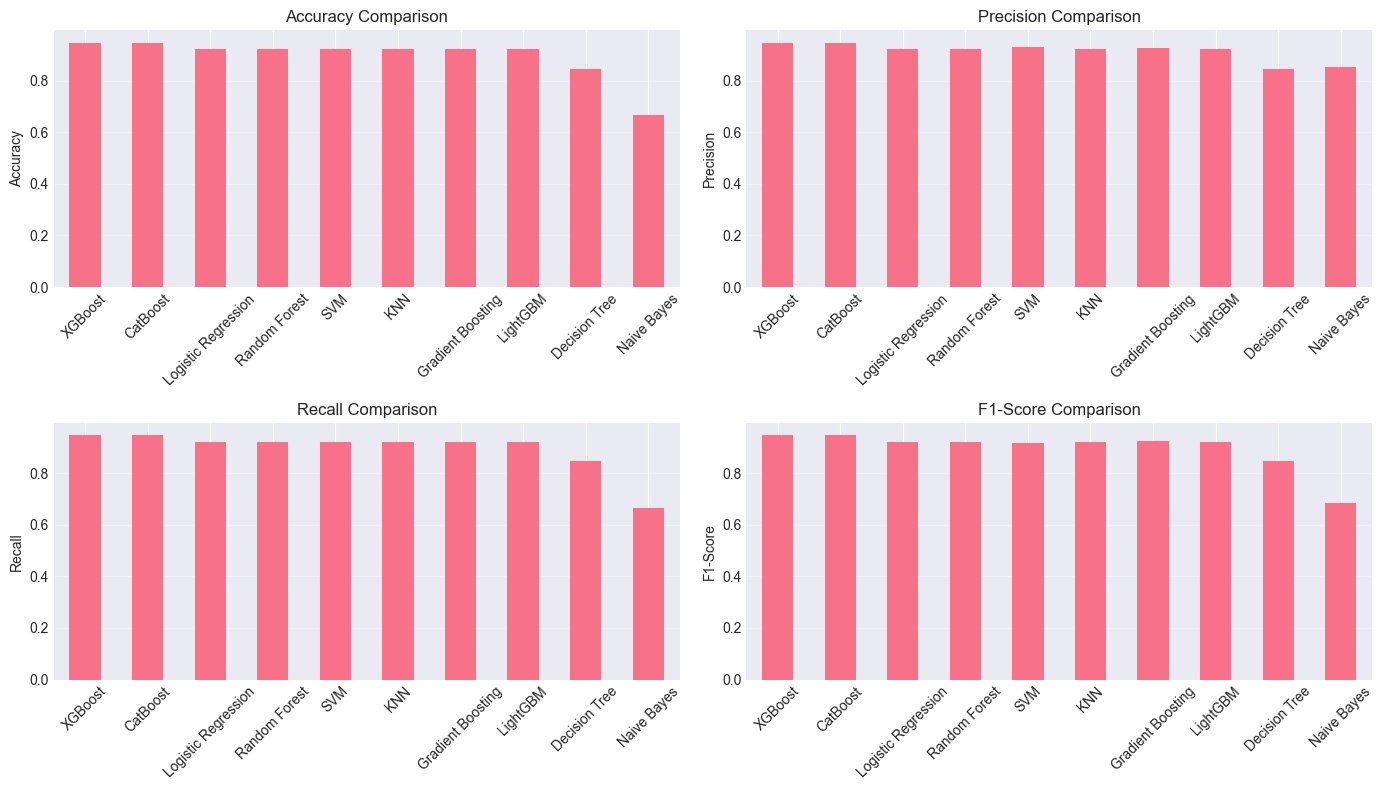

In [10]:
# Plot model comparison
evaluator.plot_model_comparison(results_df, figsize=(14, 8), 
                               save_path='../results/model_comparison.png')

In [11]:
# Get best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f'\n🏆 Best Model: {best_model_name}')
print(f'   Accuracy: {best_accuracy:.4f}')

best_model = trainer.get_model(best_model_name)


🏆 Best Model: XGBoost
   Accuracy: 0.9487


✓ Confusion matrix saved to ../results/confusion_matrix_xgboost.png


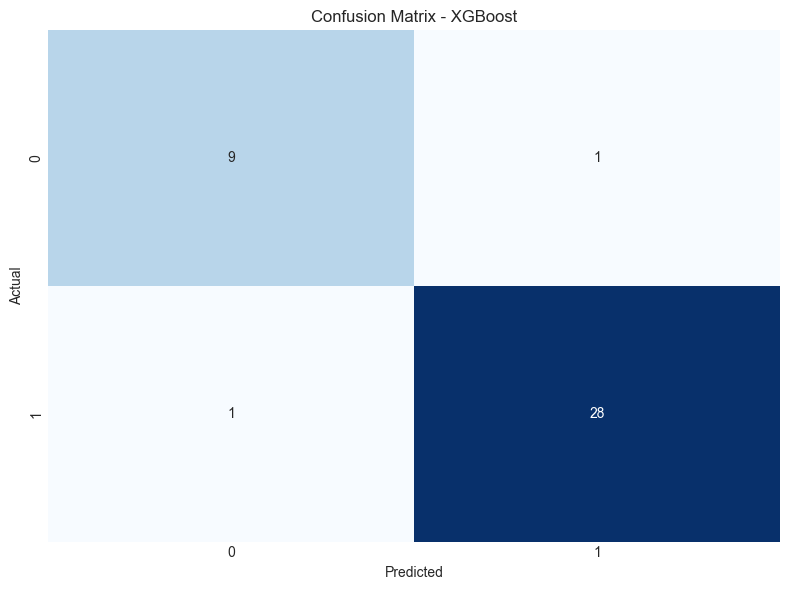

In [12]:
# Plot confusion matrix for best model
evaluator.plot_confusion_matrix(best_model_name, figsize=(8, 6),
                               save_path=f'../results/confusion_matrix_{best_model_name.replace(" ", "_").lower()}.png')

In [13]:
# Detailed classification report for best model
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)

print(f'Classification Report - {best_model_name}')
print('='*60)
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Parkinson']))

Classification Report - XGBoost
              precision    recall  f1-score   support

     Healthy       0.90      0.90      0.90        10
   Parkinson       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



## 5. Save Best Model

In [14]:
# Save best model
model_path = ModelUtils.save_model(best_model, best_model_name, save_dir='../models')

# Save preprocessing parameters
ModelUtils.save_preprocessing_params(
    scaler=preprocessor.scaler,
    feature_names=preprocessor.feature_names,
    save_dir='../models'
)

# Save evaluation results
results_df.to_csv('../results/evaluation_results.csv', index=False)
print('✓ Evaluation results saved to results/evaluation_results.csv')

✓ Model saved to ..\models\xgboost.pkl
✓ Scaler saved to ..\models\scaler.pkl
✓ Feature names saved to ..\models\feature_names.json
✓ Evaluation results saved to results/evaluation_results.csv


## 6. Test Prediction on New Data

In [15]:
# Example: Predict for one sample from test set
sample_idx = 0
sample_data = X_test[sample_idx:sample_idx+1]
actual_label = y_test.iloc[sample_idx]

prediction = best_model.predict(sample_data)[0]
probability = best_model.predict_proba(sample_data)[0]

print('Sample Prediction:')
print('='*60)
print(f'Actual: {"Parkinson" if actual_label == 1 else "Healthy"}')
print(f'Predicted: {"Parkinson" if prediction == 1 else "Healthy"}')
print(f'Probability - Healthy: {probability[0]:.4f}')
print(f'Probability - Parkinson: {probability[1]:.4f}')
print('='*60)

Sample Prediction:
Actual: Healthy
Predicted: Healthy
Probability - Healthy: 0.6091
Probability - Parkinson: 0.3909


## Summary

✓ **Completed Tasks:**
1. Data loaded and preprocessed
2. Multiple models trained
3. Models evaluated and compared
4. Best model saved
5. Ready for deployment!

**Next Steps:**
- Use the saved model for predictions
- Create a simple API or GUI for predictions
- Deploy to production if needed